# Iteration 4
This notebook demonstrates the `train` and `test` functions for the dataset. The focus is to reduce the number of Parameters from the last iteration. Add Augmentation and stepLR

In [ ]:
# Import required modules
import torch
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from model_4 import Net
from train import train, train_losses, train_acc
from test import test, test_losses, test_acc
from torchsummary import summary

In [2]:
# Data transforms (use helpers from train.py)
from train import train_transforms, test_transforms

train_transforms = train_transforms(augment=True)
test_transforms = test_transforms()

In [3]:
# Dataset and DataLoader
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [4]:
from torch.optim.lr_scheduler import StepLR

# Model, device, optimizer
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9, weight_decay=1e-4)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
summary(model, input_size=(1, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
         MaxPool2d-5           [-1, 16, 13, 13]               0
            Conv2d-6           [-1, 18, 11, 11]           2,592
              ReLU-7           [-1, 18, 11, 11]               0
       BatchNorm2d-8           [-1, 18, 11, 11]              36
           Dropout-9           [-1, 18, 11, 11]               0
           Conv2d-10             [-1, 20, 9, 9]           3,240
             ReLU-11             [-1, 20, 9, 9]               0
      BatchNorm2d-12             [-1, 20, 9, 9]              40
          Dropout-13             [-1, 20, 9, 9]               0
        MaxPool2d-14             [-1, 2

In [5]:
# Training and Testing Loop
EPOCHS = 15
for epoch in range(EPOCHS):
    print(f"EPOCH: {epoch}")
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

EPOCH: 0


Loss=0.08288209140300751 Batch_id=937 Accuracy=93.41: 100%|██████████| 938/938 [00:23<00:00, 39.57it/s]



Test set: Average loss: 0.0624, Accuracy: 9834/10000 (98.34%)

EPOCH: 1


Loss=0.09412381052970886 Batch_id=937 Accuracy=96.41: 100%|██████████| 938/938 [00:22<00:00, 41.31it/s]



Test set: Average loss: 0.0425, Accuracy: 9883/10000 (98.83%)

EPOCH: 2


Loss=0.05647800490260124 Batch_id=937 Accuracy=96.84: 100%|██████████| 938/938 [00:22<00:00, 40.95it/s]



Test set: Average loss: 0.0351, Accuracy: 9896/10000 (98.96%)

EPOCH: 3


Loss=0.25398191809654236 Batch_id=937 Accuracy=97.17: 100%|██████████| 938/938 [00:23<00:00, 40.70it/s]



Test set: Average loss: 0.0311, Accuracy: 9909/10000 (99.09%)

EPOCH: 4


Loss=0.07846911251544952 Batch_id=937 Accuracy=97.40: 100%|██████████| 938/938 [00:23<00:00, 40.75it/s]



Test set: Average loss: 0.0347, Accuracy: 9910/10000 (99.10%)

EPOCH: 5


Loss=0.2949434816837311 Batch_id=937 Accuracy=97.44: 100%|██████████| 938/938 [00:22<00:00, 40.88it/s]



Test set: Average loss: 0.0307, Accuracy: 9906/10000 (99.06%)

EPOCH: 6


Loss=0.006365465000271797 Batch_id=937 Accuracy=97.71: 100%|██████████| 938/938 [00:23<00:00, 40.76it/s]



Test set: Average loss: 0.0286, Accuracy: 9912/10000 (99.12%)

EPOCH: 7


Loss=0.037967242300510406 Batch_id=937 Accuracy=97.72: 100%|██████████| 938/938 [00:22<00:00, 41.04it/s]



Test set: Average loss: 0.0279, Accuracy: 9919/10000 (99.19%)

EPOCH: 8


Loss=0.048149459064006805 Batch_id=937 Accuracy=97.74: 100%|██████████| 938/938 [00:23<00:00, 40.77it/s]



Test set: Average loss: 0.0318, Accuracy: 9913/10000 (99.13%)

EPOCH: 9


Loss=0.02909553423523903 Batch_id=937 Accuracy=97.81: 100%|██████████| 938/938 [00:23<00:00, 40.32it/s]



Test set: Average loss: 0.0276, Accuracy: 9929/10000 (99.29%)

EPOCH: 10


Loss=0.024735398590564728 Batch_id=937 Accuracy=98.15: 100%|██████████| 938/938 [00:23<00:00, 40.09it/s]



Test set: Average loss: 0.0229, Accuracy: 9941/10000 (99.41%)

EPOCH: 11


Loss=0.025273121893405914 Batch_id=937 Accuracy=98.17: 100%|██████████| 938/938 [00:23<00:00, 40.10it/s]



Test set: Average loss: 0.0233, Accuracy: 9938/10000 (99.38%)

EPOCH: 12


Loss=0.047414861619472504 Batch_id=937 Accuracy=98.27: 100%|██████████| 938/938 [00:23<00:00, 40.20it/s]



Test set: Average loss: 0.0219, Accuracy: 9940/10000 (99.40%)

EPOCH: 13


Loss=0.03164132311940193 Batch_id=937 Accuracy=98.22: 100%|██████████| 938/938 [00:23<00:00, 40.14it/s]



Test set: Average loss: 0.0228, Accuracy: 9938/10000 (99.38%)

EPOCH: 14


Loss=0.062142811715602875 Batch_id=937 Accuracy=98.29: 100%|██████████| 938/938 [00:22<00:00, 40.82it/s]



Test set: Average loss: 0.0235, Accuracy: 9940/10000 (99.40%)



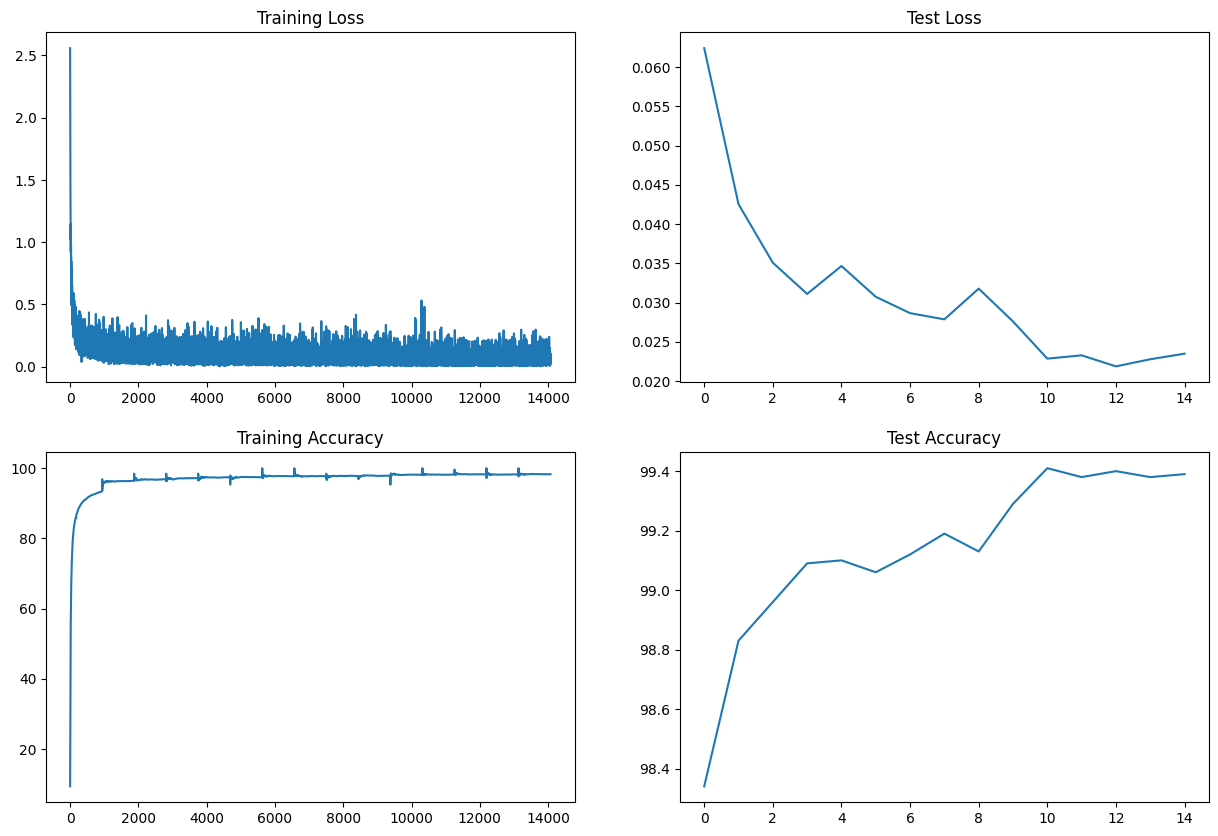

In [6]:
# Plotting results
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([t.item() for t in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.show()